In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score
dt=pd.read_csv('amazon_product.csv')
data = dt.drop(['Unnamed: 0','product_url','product_original_price' ,'product_availability' ,'product_photo', 'climate_pledge_friendly', 'sales_volume', 'delivery', 'unit_price', 'unit_count','asin'], axis=1)
data['product_star_rating'] = pd.to_numeric(data['product_star_rating'], errors='coerce')
data['product_star_rating']=data['product_star_rating'].fillna(data['product_star_rating'].median())

def convert_dollar_number(dollar):
    return float(dollar.replace('$',''))

# data['product_price'] = data['product_price'].apply(convert_dollar_number)
data['product_minimum_offer_price'] = data['product_minimum_offer_price'].apply(convert_dollar_number)
data['product_price'] = data['product_price'].apply(convert_dollar_number)
data['is_best_seller']=data['is_best_seller'].astype(int)
data['is_amazon_choice']=data['is_amazon_choice'].astype(int)
data['is_prime']=data['is_prime'].astype(int)
data['has_variations']=data['has_variations'].astype(int)

c:\Users\WIN11\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\WIN11\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


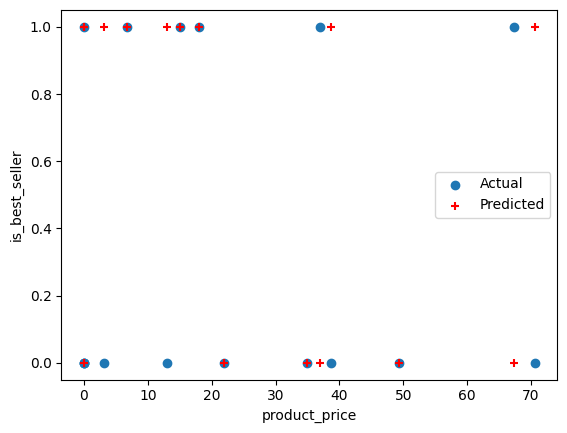

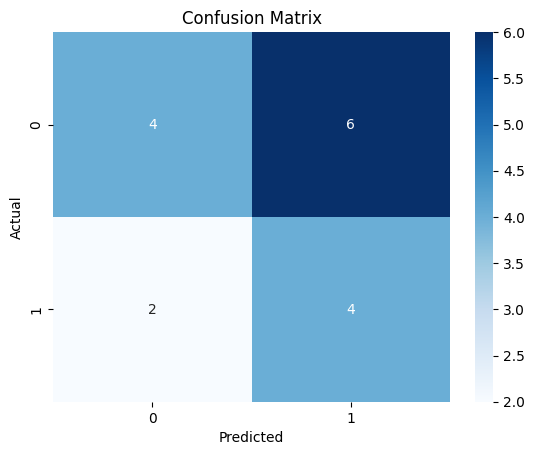

MSE: 0.5
R2: -1.1333333333333333
              precision    recall  f1-score   support

           0       0.67      0.40      0.50        10
           1       0.40      0.67      0.50         6

    accuracy                           0.50        16
   macro avg       0.53      0.53      0.50        16
weighted avg       0.57      0.50      0.50        16



In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
import seaborn as sns

# Assuming your data preparation is correct:
X = data.drop(['is_best_seller', 'product_title', 'currency'], axis=1)
y = data[['is_best_seller']]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plotting: Select a single feature from X_test for visualization (e.g., the first feature)
plt.scatter(X_test.iloc[:, 0], y_test, label='Actual')
plt.scatter(X_test.iloc[:, 0], y_pred, color='red', label='Predicted', marker='+')
plt.xlabel(X.columns[0])
plt.ylabel('is_best_seller')
plt.legend()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Print MSE and R2
print('MSE:', mse)
print('R2:', r2)

# Additional Metrics
print(classification_report(y_test, y_pred))


In [25]:
X = data.drop(['is_best_seller', 'product_title', 'currency'], axis=1)
y = data[['is_best_seller']]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
model = LogisticRegression(max_iter=10000)

# Define the hyperparameters to tune using distributions for random search
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-3, 3, 10),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'l1_ratio': np.linspace(0, 1, 10)  # Only used for elasticnet penalty
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(random_search.best_score_))

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters found:  {'solver': 'newton-cg', 'penalty': 'l2', 'l1_ratio': np.float64(0.3333333333333333), 'C': np.float64(0.001)}
Best cross-validation accuracy: 0.69
              precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.44      0.67      0.53         6

    accuracy                           0.56        16
   macro avg       0.58      0.58      0.56        16
weighted avg       0.61      0.56      0.57        16



c:\Users\WIN11\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
120 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\WIN11\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\WIN11\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\WIN11\AppD

In [26]:
from sklearn.tree import DecisionTreeClassifier
X = data.drop(['is_best_seller', 'product_title', 'currency'], axis=1)
y = data[['is_best_seller']]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
model = DecisionTreeClassifier()

# Define the hyperparameters to tune using distributions for random search
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'class_weight': [None, 'balanced'],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
    'min_impurity_decrease': [0.0, 0.01, 0.1],
    'ccp_alpha': np.linspace(0, 0.1, 10)
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(random_search.best_score_))

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

c:\Users\WIN11\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
65 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\WIN11\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\WIN11\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\WIN11\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.p

Best parameters found:  {'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 2, 'min_impurity_decrease': 0.01, 'max_leaf_nodes': 20, 'max_features': None, 'max_depth': 40, 'criterion': 'entropy', 'class_weight': 'balanced', 'ccp_alpha': np.float64(0.03333333333333333)}
Best cross-validation accuracy: 0.65
              precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.44      0.67      0.53         6

    accuracy                           0.56        16
   macro avg       0.58      0.58      0.56        16
weighted avg       0.61      0.56      0.57        16



In [27]:
from sklearn.ensemble import RandomForestClassifier
X = data.drop(['is_best_seller', 'product_title', 'currency'], axis=1)
y = data[['is_best_seller']]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
model = RandomForestClassifier()

# Define the hyperparameters to tune using distributions for random search
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'criterion': ['gini', 'entropy'],  # Criterion to measure the quality of a split
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
    'class_weight': [None, 'balanced'],  # Weights associated with classes
    'ccp_alpha': np.linspace(0, 0.1, 10)  # Complexity parameter used for Minimal Cost-Complexity Pruning
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(random_search.best_score_))

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

c:\Users\WIN11\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
45 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
19 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\WIN11\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\WIN11\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\WIN11\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.p

Best parameters found:  {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini', 'class_weight': 'balanced', 'ccp_alpha': np.float64(0.011111111111111112), 'bootstrap': False}
Best cross-validation accuracy: 0.69
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.56      0.83      0.67         6

    accuracy                           0.69        16
   macro avg       0.71      0.72      0.69        16
weighted avg       0.74      0.69      0.69        16



In [33]:
import lightgbm as lgb
X = data.drop(['is_best_seller', 'product_title', 'currency'], axis=1)
y = data[['is_best_seller']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Initialize the LightGBM classifier
model = lgb.LGBMClassifier(class_weight='balanced')

# Define the hyperparameters to tune using distributions for random search
param_dist = {
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20, 30],
    'learning_rate': [0.001, 0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 500],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_samples': [20, 30, 50]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(random_search.best_score_))

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 18, number of negative: 30
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 48, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because the

c:\Users\WIN11\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\WIN11\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\WIN11\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\WIN11\AppData\Loc